### BMI지수 학습시키기

BMI = <몸무게 kg> / 키(m)**2

In [1]:
import random

In [6]:
def calc_bmi(h, w):
    bmi = w / (h/100) **2
    if bmi < 18.5 : return 'thin'
    if bmi < 25 : return 'normal'
    return 'fat'

In [14]:
fp = open('bmi.csv','w',encoding='utf-8')
fp.write('height,weight,label\n')

20

In [15]:
#렌덤 데이터 생성
cnt = {'thin':0, 'normal':0, 'fat':0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write('{0},{1},{2}\r\n'.format(h,w,label))
fp.close()
print('ok ',cnt)

ok  {'thin': 6389, 'normal': 5899, 'fat': 7712}


In [16]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
tbl = pd.read_csv("bmi.csv", index_col=2)

In [36]:
tbl.head()

,height,weight
label,,
normal,184,77
normal,140,48
normal,179,77
normal,178,60
fat,128,71


In [37]:
label = tbl['label']
w = tbl['weight']/100
h = tbl["height"]/200
wh = pd.concat([w,h],axis=1)

KeyError: 'label'

In [38]:
label.head()

0    normal
1    normal
2    normal
3    normal
4       fat
Name: label, dtype: object

In [39]:
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)

In [40]:
clf = svm.SVC()
clf.fit(data_train,label_train)

SVC()

In [41]:
predict = clf.predict(data_test)

In [42]:
ac_score = metrics.accuracy_score(label_test, predict)
ac_score

0.996

In [43]:
tbl.head()

,height,weight
label,,
normal,184,77
normal,140,48
normal,179,77
normal,178,60
fat,128,71


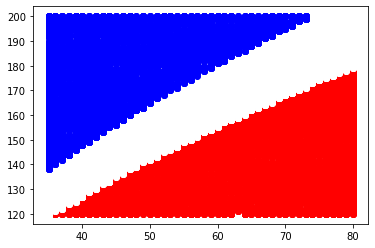

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'], c=color, label=lbl)
scatter("fat", "red")
scatter("normal", "white")
scatter("thin", "blue")

#### nearSVC()

- 선형 커널에 특화 되있으며 계산이 빠름

In [45]:
tbl = pd.read_csv('bmi.csv')

In [46]:
label = tbl['label']

In [47]:
w = tbl['weight'] / 100
h = tbl['height'] / 200

In [48]:
wh = pd.concat([w,h], axis=1)

In [49]:
data_train, data_test, label_train, label_test = \
    train_test_split(wh,label)

In [50]:
clf = svm.LinearSVC()
clf.fit(data_train, label_train)

LinearSVC()

In [51]:
predict = clf.predict(data_test)

In [52]:
ac_score = metrics.accuracy_score(label_test, predict)
ac_score

0.9166